<h1><b>FINAL PROJECT UJIAN AKHIR SEMESTER GENAP</b></h1>

<h2><b>Big Data And Predictive Analytics</b></h2>

<h5>Anggota Kelompok :</h5>
<ol>
    <li><p>Haikal Raditya Fadhilah</p></li>
    <li><p>Wulan Kristiyanti</p></li>
    <li><p>Gilang Ramadhani</p></li>
</ol>


<h2><b>IMPORT LIBRARY</b></h2>

In [131]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy as stats

<h2><b>IMPORT DATASET</b></h2>


In [132]:
df = pd.read_csv('./DATASET/house_price.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


<h3><b>MEMPERSIAPKAN DATA</b></h3>
<p><b>1) Melihat Jumlah Baris Dan Column Dataset</b></p>

In [133]:
df.shape

(4600, 18)

<p><b>2) Melihat tipe data tiap kolom dari dataset</b></p>

In [134]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

<p><b>3 Melihat data kolom apakah ada yang terdapat data kosong (NA) dan menghitung serta membersihkan data NULL</b></p>

In [135]:
df.isna()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<p><b>4 Melihat Jumlah Data Yang Kosong Atau NA</b></p>

In [136]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

<p><b>5 Menghilangkan kolom yang tidak di gunakan</b></p>

In [137]:
df
df.drop(columns=['floors','waterfront','yr_renovated','street','city','country','statezip','sqft_basement'],inplace=True)

<h3><b>EDA (Exploratory Data Analytics)</b></h3>
<p><b>1.Print DataFrame</b></p>

In [138]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,sqft_above,yr_built
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,0,3,1340,1955
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,4,5,3370,1921
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,0,4,1930,1966
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,0,4,1000,1963
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,0,4,1140,1976
...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,0,4,1510,1954
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,0,3,1460,1983
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,0,3,3010,2009
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,0,3,1070,1974


<p><b>2.Melihat 10 Data Teratas</b></p>

In [139]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,sqft_above,yr_built
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,0,3,1340,1955
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,4,5,3370,1921
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,0,4,1930,1966
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,0,4,1000,1963
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,0,4,1140,1976
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,0,3,880,1938
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,0,3,1350,1976
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,0,3,2710,1989
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,0,4,1570,1985
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,0,3,1520,1945


<p><b>3.Melihat 10 Data Terakhir</b></p>

In [140]:
df.tail(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,sqft_above,yr_built
4590,2014-07-08 00:00:00,380680.555556,4.0,2.50,2620,8331,0,3,2620,1991
4591,2014-07-08 00:00:00,396166.666667,3.0,1.75,1880,5752,0,4,940,1945
4592,2014-07-08 00:00:00,252980.000000,4.0,2.50,2530,8169,0,3,2530,1993
4593,2014-07-08 00:00:00,289373.307692,3.0,2.50,2538,4600,0,3,2538,2013
4594,2014-07-09 00:00:00,210614.285714,3.0,2.50,1610,7223,0,3,1610,1994
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,0,4,1510,1954
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,0,3,1460,1983
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,0,3,3010,2009
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,0,3,1070,1974
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,0,4,1490,1990


<p><b>3.Melihat Nama-nama Column Dari Dataset</b></p>

In [141]:
df.columns  

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'view', 'condition', 'sqft_above', 'yr_built'],
      dtype='object')

<p><b>4.Melihat Informasi column dataset</b></p>

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4600 non-null   object 
 1   price        4600 non-null   float64
 2   bedrooms     4600 non-null   float64
 3   bathrooms    4600 non-null   float64
 4   sqft_living  4600 non-null   int64  
 5   sqft_lot     4600 non-null   int64  
 6   view         4600 non-null   int64  
 7   condition    4600 non-null   int64  
 8   sqft_above   4600 non-null   int64  
 9   yr_built     4600 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 359.5+ KB


<p><b>5.Melihat deskripsi dari dataset</b></p>

In [143]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,sqft_above,yr_built
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,0.240652,3.451739,1827.265435,1970.786304
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.778405,0.677230,862.168977,29.731848
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,0.000000,1.000000,370.000000,1900.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,0.000000,3.000000,1190.000000,1951.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,0.000000,3.000000,1590.000000,1976.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,0.000000,4.000000,2300.000000,1997.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,4.000000,5.000000,9410.000000,2014.000000


<p><b>6 Membersihkan data yang tidak logis</b></p>
<ul>
    <li>Harga rumah yang nilainya = 0</li>
</ul>

In [144]:
#Menghapus Baris Data Yang Nilai Kolom Harganya 0
df = df[df['price'] > 0].sort_values('price')
df.reset_index(drop=True,inplace=True)
df.shape

(4551, 10)

<p><b>7 Membersihkan Data Outliers</b></p>

In [145]:
#Membuat Fungsi Untuk Membersihkan Outliers
def clear_outliers (dataset,kolom):
    Q1 = dataset[kolom].quantile(0.25)
    Q3 = dataset[kolom].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr = Q1 - 1.5 * IQR;
    max_iqr = Q3 + 1.5 * IQR;
    return dataset.loc[(dataset[kolom] > min_iqr) & (dataset[kolom] < max_iqr)]

In [146]:
# Membersihkan Data Outliers Pada Kolom Sqft Living
df = clear_outliers(df,'sqft_living');

In [147]:
# Membersihkan Data Outliers Pada Kolom Sqft Living
df = clear_outliers(df,'sqft_lot');

In [148]:
# Membersihkan Data Outliers Pada Kolom Sqft above
df = clear_outliers(df,'sqft_above');

In [149]:
# Mengurutkan Data Berdasarkan Kolom Harga Secara Ascending Serta Mereset Index
df.sort_values('price',ascending=True,inplace=True)
df.reset_index(inplace=True,drop=True)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,sqft_above,yr_built
0,2014-05-06 00:00:00,7.800000e+03,2.0,1.00,780,16344,0,1,780,1942
1,2014-05-23 00:00:00,8.000000e+04,1.0,0.75,430,5050,0,2,430,1912
2,2014-05-29 00:00:00,8.300000e+04,2.0,1.00,900,8580,0,3,900,1918
3,2014-05-20 00:00:00,8.330000e+04,3.0,2.00,1490,7770,0,4,1490,1990
4,2014-06-01 00:00:00,8.435000e+04,4.0,2.00,2630,16475,0,4,2630,1953
...,...,...,...,...,...,...,...,...,...,...
3846,2014-06-04 00:00:00,2.400000e+06,5.0,3.25,3410,9088,3,3,2760,1912
3847,2014-05-09 00:00:00,2.400000e+06,3.0,2.25,3000,11665,4,3,3000,2001
3848,2014-06-05 00:00:00,2.560498e+06,3.0,2.50,1710,1664,0,5,1300,2003
3849,2014-06-23 00:00:00,1.289900e+07,3.0,2.50,2190,11394,0,3,1550,1956


<p><b>8 Melihat Deskripsi Data Setelah Di Bersihkan Dari Data Outliers</b></p>

In [150]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,sqft_above,yr_built
count,3.851000e+03,3851.000000,3851.000000,3851.000000,3851.000000,3851.000000,3851.000000,3851.000000,3851.000000
mean,5.110168e+05,3.327188,2.063944,1946.683459,7220.217606,0.185147,3.463256,1655.435471,1969.177616
std,5.385285e+05,0.875903,0.698526,713.006551,3580.341334,0.668977,0.679486,651.987672,30.599705
min,7.800000e+03,0.000000,0.000000,370.000000,638.000000,0.000000,1.000000,370.000000,1900.000000
25%,3.147250e+05,3.000000,1.500000,1400.000000,4750.000000,0.000000,3.000000,1150.000000,1948.000000
50%,4.400000e+05,3.000000,2.250000,1870.000000,7128.000000,0.000000,3.000000,1481.000000,1971.000000
75%,6.130000e+05,4.000000,2.500000,2420.000000,9300.000000,0.000000,4.000000,2070.000000,1997.000000
max,2.659000e+07,9.000000,5.250000,4290.000000,19126.000000,4.000000,5.000000,3530.000000,2014.000000


<p><b>9 Melihat Korelasi Setiap Variabel</b></p>

In [151]:
df.corr()

/tmp/ipykernel_13048/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,sqft_above,yr_built
price,1.000000,0.131676,0.218724,0.292268,0.027855,0.184115,0.059312,0.227635,-0.021773
bedrooms,0.131676,1.000000,0.509397,0.618098,0.203962,0.078333,0.031988,0.472237,0.125703
bathrooms,0.218724,0.509397,1.000000,0.712028,-0.008572,0.152386,-0.120434,0.624758,0.479199
sqft_living,0.292268,0.618098,0.712028,1.000000,0.226446,0.250315,-0.030700,0.818566,0.262364
sqft_lot,0.027855,0.203962,-0.008572,0.226446,1.000000,0.085590,0.113724,0.188524,-0.019585
view,0.184115,0.078333,0.152386,0.250315,0.085590,1.000000,0.067825,0.098111,-0.091797
condition,0.059312,0.031988,-0.120434,-0.030700,0.113724,0.067825,1.000000,-0.181509,-0.406397
sqft_above,0.227635,0.472237,0.624758,0.818566,0.188524,0.098111,-0.181509,1.000000,0.418864
yr_built,-0.021773,0.125703,0.479199,0.262364,-0.019585,-0.091797,-0.406397,0.418864,1.000000


<h3><b>VISUALIASI DATA</b></h3>


<p><b>1 Meilihat Jumlah Data Rumah Berdasarkan Kondisinya</b></p>

In [152]:
# Mengseleksi Data Serta Menghitung Jumlah Data Rumah Berdasarkan Kondisi Rumah
kondisi_rumah = df['condition'].value_counts().rename_axis('kondisi').reset_index(name='jumlah')
numeric_condition = [1,2,3,4,5];
string_condition = ['Sangat Buruk','Buruk','Sedang','Bagus','Sangat Bagus']
kondisi_rumah['kondisi'].replace(numeric_condition,string_condition,inplace=True);

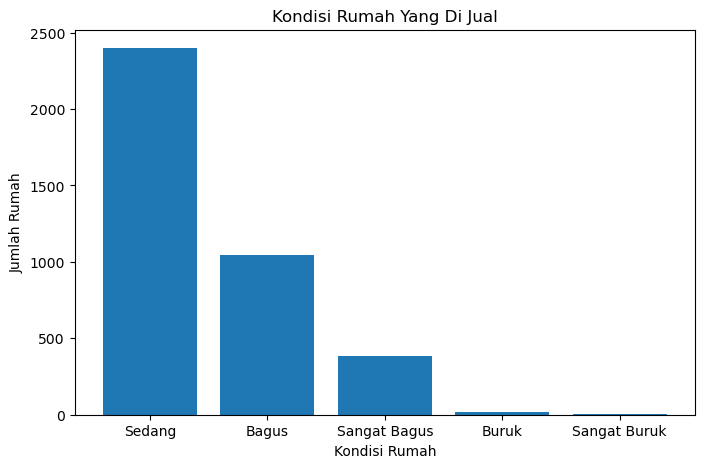

In [153]:
# Membuat Bar Plot Untuk Mevisualisasikan Jumlah Data Rumah Setiap Kondisi
fig = plt.subplots(figsize=(8,5))
plt.bar(kondisi_rumah['kondisi'],kondisi_rumah['jumlah'],)
plt.title('Kondisi Rumah Yang Di Jual')
plt.ylabel('Jumlah Rumah')
plt.xlabel('Kondisi Rumah')
plt.show()

<p><b>2 Memvisualisasikan Data Harga Minimun Rumah Dari Tahun Ke Tahun</b></p>

In [193]:
# Mengambil Dan Mengelompokkan Data Harga Dan Ukuran Properti Rumah Minimal Berdasarkan Tahun
tahun_buat = df[['yr_built','sqft_lot','price']].groupby('yr_built',as_index=False).min()

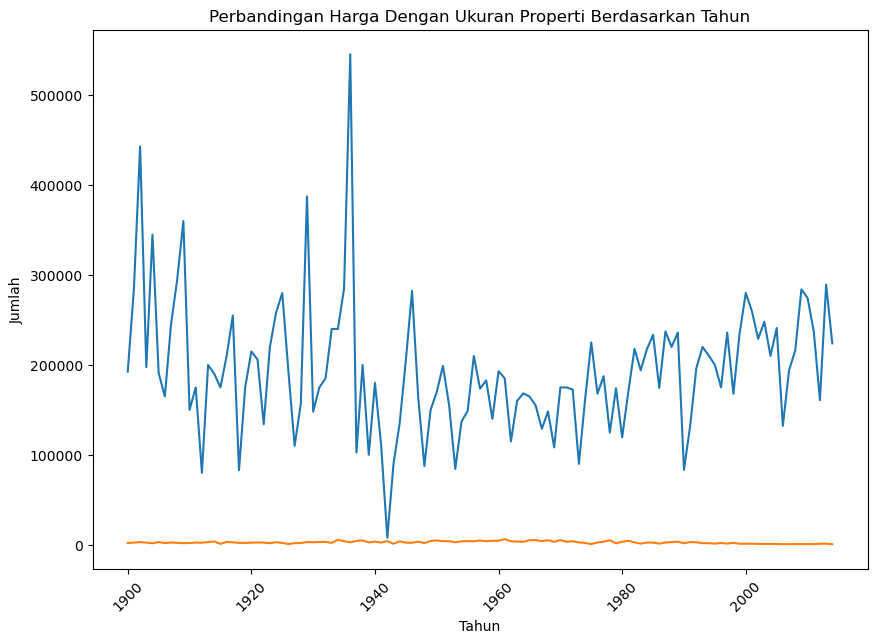

In [194]:
# Menvisualisasikan Antara Harga Rumah Den Ukuran properti Berdasarkan Tahun Dengan Line Chart
fig,ax = plt.subplots(figsize=(10,7))
ax.plot(tahun_buat['yr_built'],tahun_buat['price']);
ax.plot(tahun_buat['yr_built'],tahun_buat['sqft_lot']);
plt.xticks(rotation=45)
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.title("Perbandingan Harga Dengan Ukuran Properti Berdasarkan Tahun")
plt.show()

<p><b>3 Memvisualisasikan Data</b></p>

<h3><b>KORELASI VARIABLE</b></h3>


<p><b>1.Melihat korelasi seluruh variabel</b></p>